In [1]:
path = 'https://raw.githubusercontent.com/LunusMax/football-data/refs/heads/main/Brasileirao/Eficiencia/goal_loss.csv'

In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from matplotlib import cm
from matplotlib.colors import ListedColormap

In [3]:
data = pd.read_csv(path, sep=';')

In [4]:
data.head()

,Player,Team,G,G-PK,xG,npxG
0,Yuri Alberto,Corinthians,7,6,8.2,7.0
1,Rony,Atlético-MG,4,4,6.9,6.9
2,Ademir,Bahia,1,1,3.2,3.2
3,Luciano,São Paulo,7,6,8.7,7.1
4,Talles Magno,Corinthians,1,1,4.1,4.1


In [5]:
data.columns

Index(['Player', 'Team', 'G', 'G-PK', 'xG', 'npxG'], dtype='object')

In [8]:
import pandas as pd

# Garante numéricos (se já estiver ok, não muda nada)
for col in ['G', 'G-PK', 'xG', 'npxG']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Eficiência sem pênalti: npG - npxG
data['Diff'] = data['G-PK'] - data['npxG']

# Só quem está abaixo do esperado (perde-gol)
perde = data[data['Diff'] < 0].copy()

# Ordena do pior (mais negativo) pro menos pior
perde = perde.sort_values('Diff', ascending=True)

# Seleciona colunas-chave pra tabela final
cols_out = ['Player', 'Team', 'G', 'G-PK', 'xG', 'npxG', 'Diff']
ranking_perde = perde[cols_out].head(TOP_N).reset_index(drop=True)

ranking_perde

,Player,Team,G,G-PK,xG,npxG,Diff
0,Tiquinho Soares,Santos,2,0,3.6,3.6,-3.6
1,Talles Magno,Corinthians,1,1,4.1,4.1,-3.1
2,Rony,Atlético-MG,4,4,6.9,6.9,-2.9
3,Eduardo Sasha,Bragantino,5,3,7.3,5.8,-2.8
4,Ademir,Bahia,1,1,3.2,3.2,-2.2
5,Adam Bareiro,Fortaleza,1,1,4.0,3.0,-2.0
6,Rafael Borré,Internacional,5,4,6.7,5.7,-1.7
7,Chrystian Barletta,Sport,2,2,3.6,3.6,-1.6
8,Pedro Raul,Ceará,8,7,9.4,8.6,-1.6
9,Derik Lacerda,Sport,6,5,7.2,6.4,-1.4


/tmp/ipython-input-1448883668.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  base = cm.get_cmap("RdYlGn", 256)


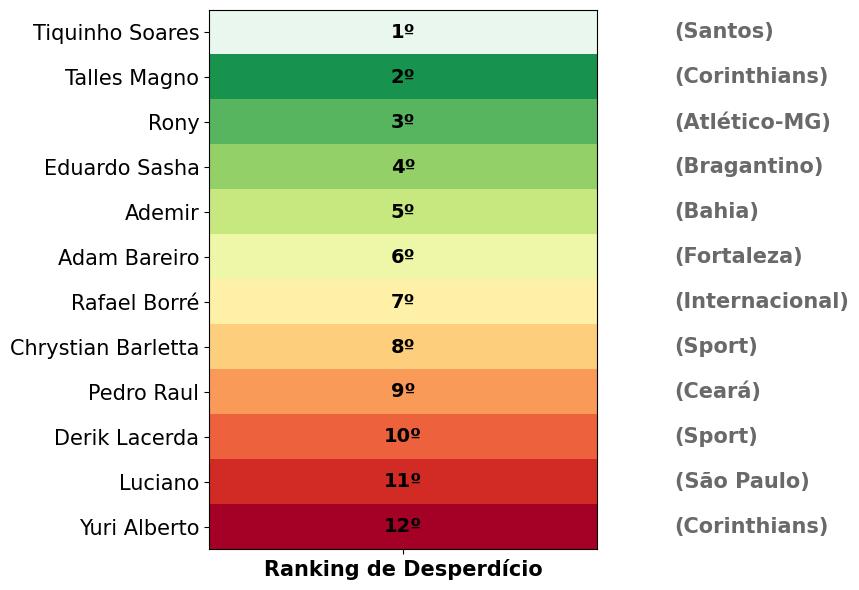

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap

# --- ranking de jogadores que mais perderam gols ---

# cria ranking (quanto menor o Diff, pior a finalização)
data['rank_perde'] = data['Diff'].rank(ascending=True, method='min')

# ordena pela posição
data_sorted = data.sort_values("rank_perde").copy()
order = data_sorted["Player"].tolist()
teams = data_sorted["Team"].tolist()
idxd = data_sorted.set_index("Player").reindex(order)

# valores normalizados (para colormap)
def percent_rank_from_rank(series):
    r = series.astype(float).values
    n = len(r)
    return np.ones_like(r) if n <= 1 else 1.0 - (r - 1.0) / (n - 1.0)

vals = np.c_[percent_rank_from_rank(idxd["rank_perde"])]

# rótulos dentro das células (posição)
labels = np.array([
    [f"{int(r)}º"]
    for r in idxd["rank_perde"]
])

cols = ["Ranking de Desperdício"]

# colormap estilo RdYlGn (inverso: vermelho = pior)
base = cm.get_cmap("RdYlGn", 256)
colors = base(np.linspace(0, 1, 256))
colors[-1, :] = np.array([233/255, 247/255, 239/255, 1.0])
custom_cmap = ListedColormap(colors)

# fontes
FS_TITLE = 20
FS_TICKS = 15
FS_CELLS = 14

# plot
fig, ax = plt.subplots(figsize=(9, max(6, 0.45 * len(order))))
im = ax.imshow(vals, aspect="auto", cmap=custom_cmap, vmin=0, vmax=1)

# ticks e labels (nomes dos jogadores)
ax.set_xticks(range(len(cols)))
ax.set_xticklabels(cols, fontsize=FS_TICKS, fontweight="bold")
ax.set_yticks(range(len(order)))
ax.set_yticklabels(order, fontsize=FS_TICKS)

# rótulos nas células (ranking)
for i in range(vals.shape[0]):
    ax.text(0, i, labels[i, 0], ha="center", va="center",
            fontsize=FS_CELLS, fontweight="bold")

# --- adiciona os nomes dos times à direita ---
x_lim = ax.get_xlim()[1]
for i, team in enumerate(teams):
    ax.text(x_lim + 0.2, i, f"({team})", va='center',
            fontsize=FS_TICKS, color='dimgray', fontweight='bold')

#ax.set_title("Ranking de Jogadores que Mais Perderam Gols (npxG vs npG)",
#             fontsize=FS_TITLE, fontweight="bold", pad=15)

# tira bordas extras e ajusta margens pra caber os times
plt.subplots_adjust(left=0.25, right=0.85)
plt.tight_layout()
plt.savefig("heatmap_perde_gol_2025.png", dpi=150, bbox_inches='tight')
plt.show()

/tmp/ipython-input-3180347946.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ranking_final['Jogador'] = ranking_final['Jogador'].str.replace("Chrystian Barletta", "C. Barletta")


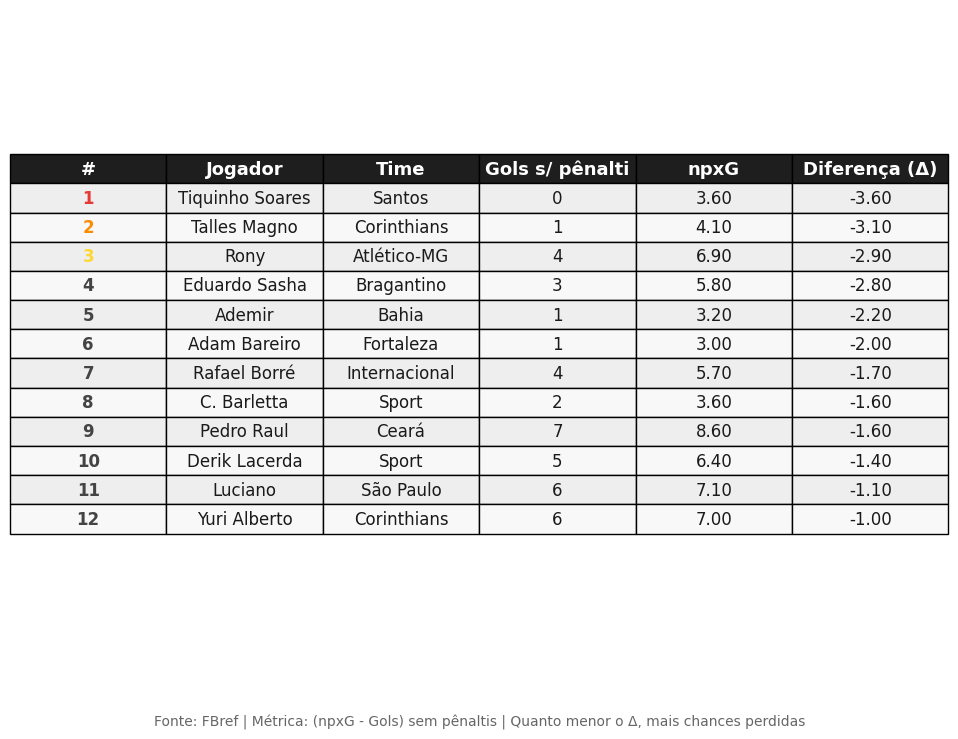

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# --- parâmetros principais ---
TOP_N = 15
ARQUIVO_SAIDA = "tabela_perde_gol_2025_refinada.png"

# --- cálculo e formatação ---
for col in ['G', 'G-PK', 'xG', 'npxG']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# diferença (npG - npxG)
data['Diff'] = data['G-PK'] - data['npxG']
data['rank'] = data['Diff'].rank(ascending=True, method='min').astype(int)

ranking = data.sort_values('Diff', ascending=True).head(TOP_N).reset_index(drop=True)
ranking['npxG'] = ranking['npxG'].map('{:.2f}'.format)
ranking['Diff'] = ranking['Diff'].map('{:+.2f}'.format)
ranking['G-PK'] = ranking['G-PK'].astype(int)

ranking_final = ranking[['rank', 'Player', 'Team', 'G-PK', 'npxG', 'Diff']]
ranking_final.columns = ['#', 'Jogador', 'Time', 'Gols s/ pênalti', 'npxG', 'Diferença (Δ)']

# --- corrige nomes longos ---
ranking_final['Jogador'] = ranking_final['Jogador'].str.replace("Chrystian Barletta", "C. Barletta")

# --- estilo visual de post ---
fig, ax = plt.subplots(figsize=(8.5, 0.6 * len(ranking_final)))
ax.axis('off')

# tabela
table = ax.table(
    cellText=ranking_final.values,
    colLabels=ranking_final.columns,
    cellLoc='center',
    loc='center'
)

# estilo geral
table.auto_set_font_size(False)
table.set_fontsize(13)
table.scale(1.15, 1.45)

# --- cabeçalho e corpo ---
for (i, j), cell in table.get_celld().items():
    if i == 0:
        cell.set_text_props(weight='bold', color='white', fontsize=13)
        cell.set_facecolor('#1e1e1e')
    else:
        cell.set_facecolor('#f8f8f8' if i % 2 == 0 else '#eeeeee')
        cell.set_text_props(color='#1a1a1a', fontsize=12)

        # ranking colorido
        if j == 0:
            pos = int(ranking_final.iloc[i-1, 0])
            if pos == 1:
                cell.set_text_props(color='#E53935', weight='bold')
            elif pos == 2:
                cell.set_text_props(color='#FB8C00', weight='bold')
            elif pos == 3:
                cell.set_text_props(color='#FDD835', weight='bold')
            else:
                cell.set_text_props(weight='bold', color='#444')

# --- rodapé discreto ---
plt.figtext(
    0.5, -0.015,
    "Fonte: FBref | Métrica: (npxG - Gols) sem pênaltis | Quanto menor o Δ, mais chances perdidas",
    ha="center", fontsize=10, color="#666666"
)

# remove espaços extras
plt.subplots_adjust(left=0.02, right=0.98, top=0.98, bottom=0.05)
plt.savefig(ARQUIVO_SAIDA, dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()
